In [60]:
# Imports needed or not
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn import metrics
import statsmodels.api as sm
import category_encoders as ce
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

In [6]:
import gc
gc.enable()

In [7]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [8]:
# Trying to see all the columns of the dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [281]:
# Read the csv's
train_features = pd.read_csv('train_features.csv')
test_features = pd.read_csv('test_features.csv')
train_labels = pd.read_csv('train_labels.csv')
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [282]:
# Get some idea of the numbers I am working with
print(train_features.shape)
train_features.describe()

(59400, 40)


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


**Labels dataframe includes the status_group along with the id. The status group is the dependent variable here. The id needs to be used to track the status group.**

In [283]:
# Checking for values
train_labels.status_group.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

**This indicates what our expectations should be for our outcomes. Function here is ~53.31%. Non-Function is ~38.42%. And, functional needs repair is ~7.27%**

In [284]:
y = train_labels.drop(columns='id')
print(train_labels.shape)

(59400, 2)


In [285]:
X_train, X_test, y_train, y_test = train_test_split(
        train_features, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print()
print('y_train shape is ', y_train.shape)
print('y_test shape is ', y_test.shape)

X_train shape is  (44550, 40)
X_test shape is  (14850, 40)

y_train shape is  (44550, 1)
y_test shape is  (14850, 1)


In [286]:
# Baseline Prediction
majority_class = train_labels['status_group'].mode()[0]
y_pred = np.full(shape=train_labels['status_group'].shape, fill_value=majority_class)
print(train_labels.status_group.shape)
y_pred.shape

(59400,)


(59400,)

In [287]:
accuracy_score(train_labels['status_group'], y_pred)

0.543080808080808

In [288]:
# Making submission DataFrame
submission = pd.DataFrame(y_pred, columns=['status_group_included'])
submission = pd.concat([train_labels, submission], axis=1)
submission.head()

,id,status_group,status_group_included
0,69572,functional,functional
1,8776,functional,functional
2,34310,functional,functional
3,67743,non functional,functional
4,19728,functional,functional


In [289]:
submission = submission.drop(columns='status_group')
print(submission.shape)
submission.head()

(59400, 2)


,id,status_group_included
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,functional
4,19728,functional


In [290]:
# Checking for null values
train_features.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [291]:
# Filling null values with the mode
train_features['funder'] = train_features['funder'].fillna(train_features['funder'].mode()[0])
train_features['installer'] = train_features['installer'].fillna(train_features['installer'].mode()[0])
train_features['subvillage'] = train_features['subvillage'].fillna(train_features['subvillage'].mode()[0])
train_features['public_meeting'] = train_features['public_meeting'].fillna(train_features['public_meeting'].mode()[0])
train_features['scheme_management'] = train_features['scheme_management'].fillna(train_features['scheme_management'].mode()[0])
train_features['permit'] = train_features['permit'].fillna(train_features['permit'].mode()[0])
train_features['scheme_name'] = train_features['scheme_name'].fillna(train_features['scheme_name'].mode()[0])
# train_features.head()
# train_features.isnull().sum()

In [292]:
# Making all objects into numbers
def encode_cat(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

---

In [293]:
X_test_features = test_features.copy()
X_test_features.head()
# X_test_features.shape

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [294]:
X_test_features.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    783
gps_height                  0
installer                 788
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 94
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            785
recorded_by                 0
scheme_management         939
scheme_name              6839
permit                    663
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [295]:
X_test_features['funder'] = test_features['funder'].fillna(test_features['funder'].mode()[0])
X_test_features['installer'] = test_features['installer'].fillna(test_features['installer'].mode()[0])
X_test_features['subvillage'] = test_features['subvillage'].fillna(test_features['subvillage'].mode()[0])
X_test_features['public_meeting'] = test_features['public_meeting'].fillna(test_features['public_meeting'].mode()[0])
X_test_features['scheme_management'] = test_features['scheme_management'].fillna(test_features['scheme_management'].mode()[0])
X_test_features['permit'] = test_features['permit'].fillna(test_features['permit'].mode()[0])
X_test_features['scheme_name'] = test_features['scheme_name'].fillna(test_features['scheme_name'].mode()[0])

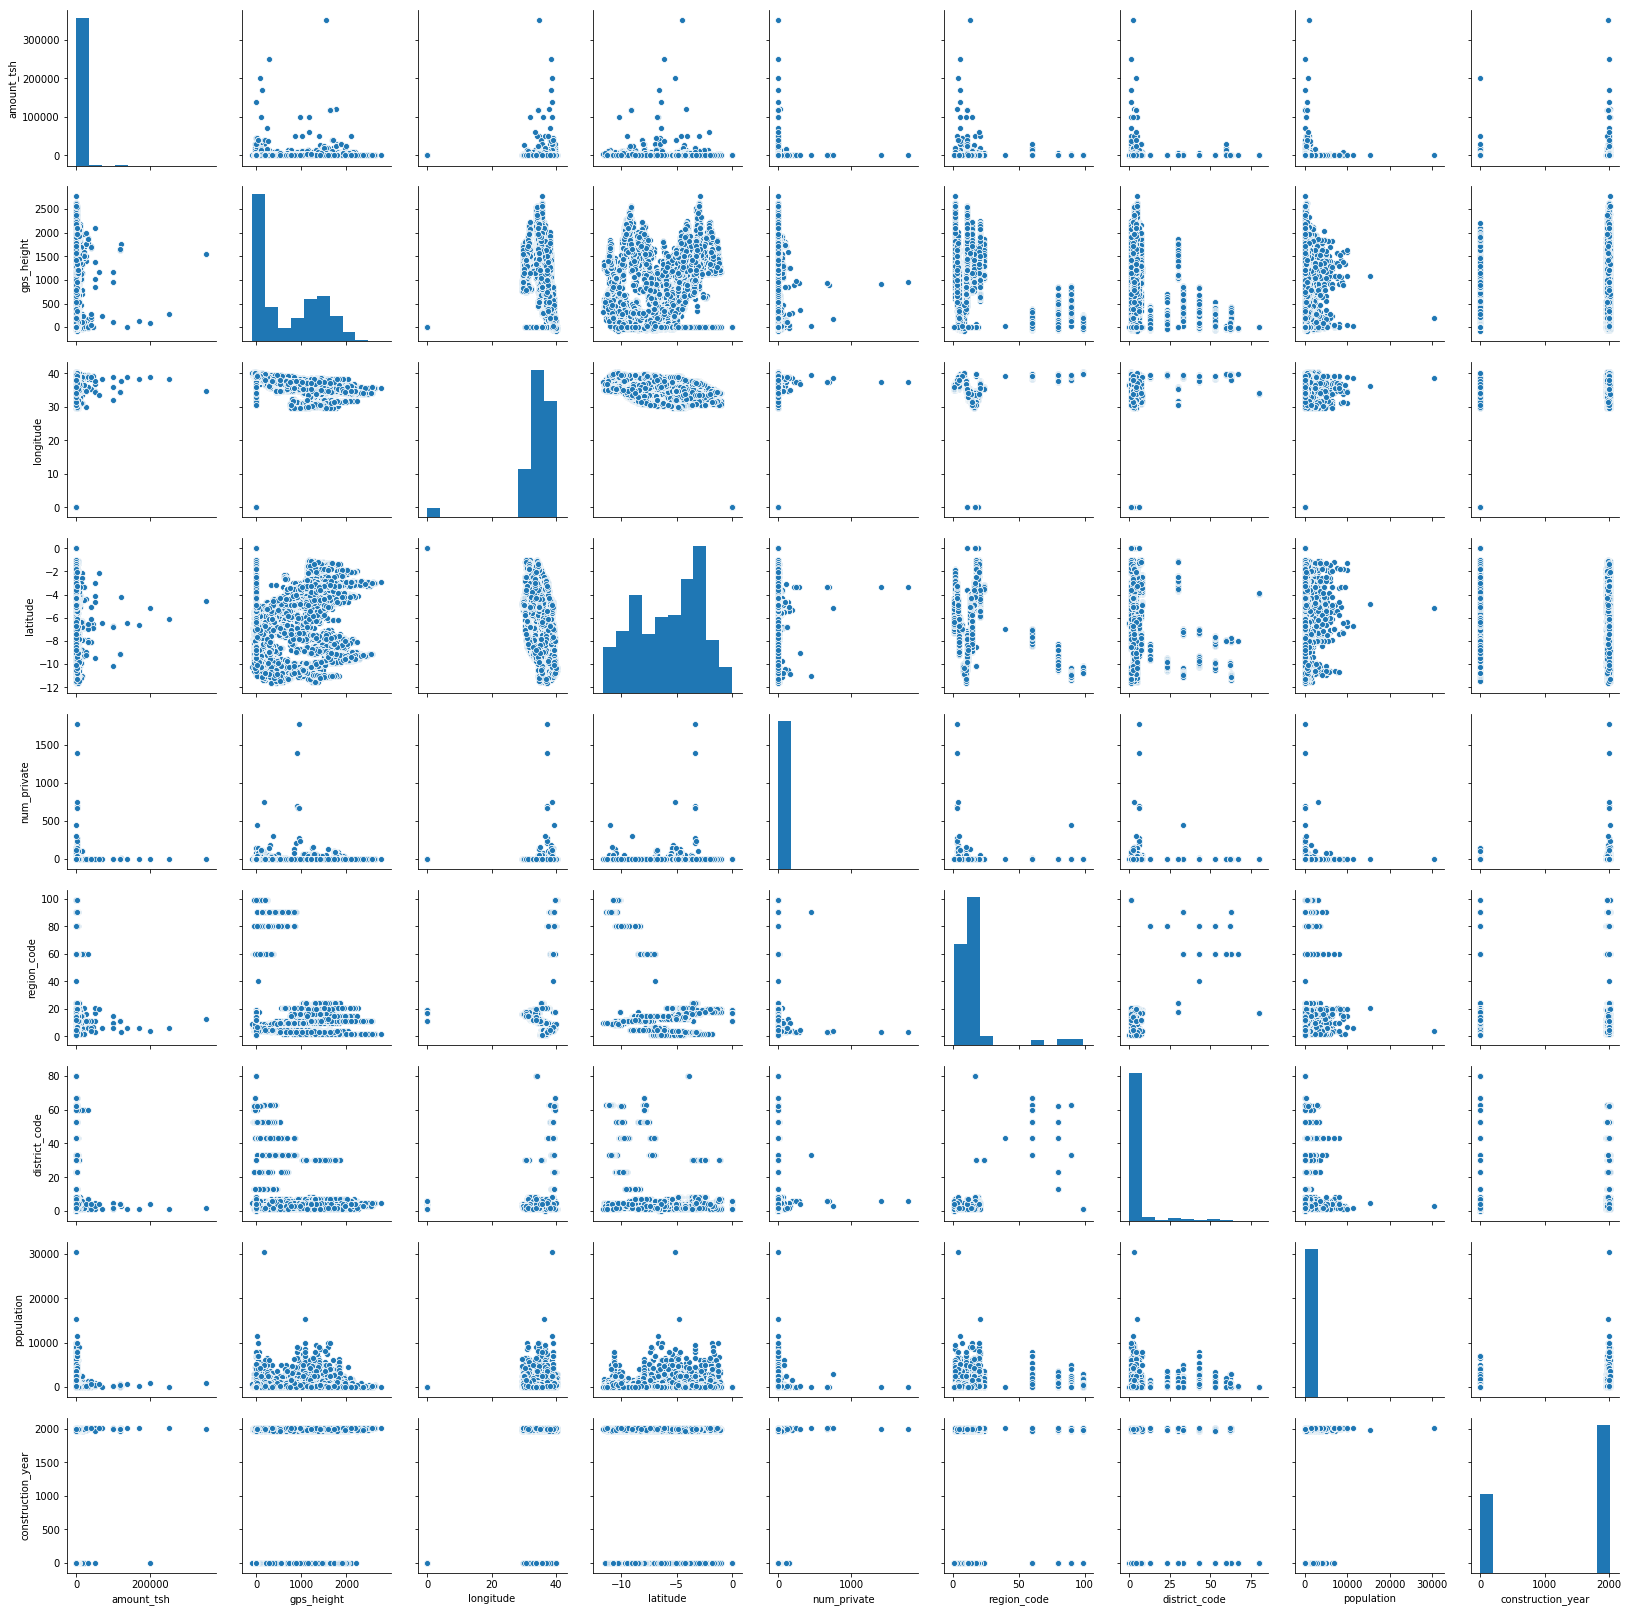

In [90]:
train_features_numeric = train_features.select_dtypes(exclude=['object'])
train_features_numeric = train_features_numeric.drop(columns='id')
train_features_numeric = train_features_numeric.drop(columns='public_meeting')
train_features_numeric = train_features_numeric.drop(columns='permit')
plot = sns.pairplot(train_features_numeric)
# train_features_numeric.head()

The only features that have an obvious correlation are latitude and longitude. Though, this gives no indication of whether there is a correlation with the status_group.

In [296]:
# Using only numeric columns for now
X = train_features.select_dtypes('number')
X = X.drop(columns='id')
X = scale(X)

In [297]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print()
print('y_train shape is ', y_train.shape)
print('y_test shape is ', y_test.shape)

X_train shape is  (44550, 9)
X_test shape is  (14850, 9)

y_train shape is  (44550, 1)
y_test shape is  (14850, 1)


In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_train)
accuracy_score(y_train,y_pred)

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.55672278338945

In [93]:
X_test_features.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [94]:
X_test_features.shape

(14358, 40)

In [95]:
# Using test data
X_test_data = X_test_features.drop(columns='id')
X_test_data = X_test_data.select_dtypes('number')
X_test_data = scale(X_test_data)
#Testing with Test data
X_test_data

array([[-0.12798429,  1.9504066 ,  0.18408659, ..., -0.2770127 ,
         0.28136694,  0.74932705],
       [-0.12798429,  1.32999082,  0.39217066, ..., -0.37911642,
         0.23725387,  0.73672887],
       [-0.12798429,  1.32708489,  0.10442199, ..., -0.37911642,
         0.65737833,  0.74722736],
       ...,
       [-0.12798429,  1.19486514,  0.1001475 , ..., -0.37911642,
         0.02719163,  0.74722736],
       [-0.12798429,  0.50034818,  0.20570873, ..., -0.37911642,
        -0.07783948,  0.74617751],
       [-0.12798429, -0.25083439,  0.10399411, ..., -0.2770127 ,
        -0.30890794,  0.74512766]])

In [30]:
# Logistic Regression Model
y_pred = log_reg.predict(X_test_data)
prediction_df = pd.DataFrame(y_pred)
identities = pd.DataFrame(X_test_features['id'])
print(identities.shape)
test_first_pass = identities.join(prediction_df)
test_first_pass.rename(columns={0: 'status_group'}, inplace=True)

(14358, 1)


In [31]:
print(test_first_pass.shape)
test_first_pass.head()

(14358, 2)


,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [32]:
test_first_pass.to_csv(path_or_buf="/Users/danielleromanoff/Documents/Lambda/DS-Unit-2-Project-Week/Submission.csv", index=False)

In [33]:
Xtf = train_features.drop(columns='id')
Xtf_names = Xtf.select_dtypes('number').columns
coefficients = log_reg.fit(X_train, y_train).coef_[0]
print(pd.Series(coefficients, Xtf_names).to_string())

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


amount_tsh           0.547098
gps_height           0.231932
longitude            0.053451
latitude             0.005779
num_private          0.008021
region_code         -0.213749
district_code        0.080337
population           0.032038
construction_year   -0.099093


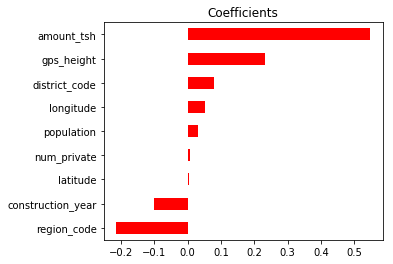

In [34]:
plt.figure(figsize = (5, 4))
plt.title('Coefficients')
pd.Series(coefficients, Xtf_names).sort_values().plot.barh(color = 'r')

In [35]:
# Encoding training features
encode_df = train_features.copy()
encode_df = encode_cat(encode_df)
print('Encode_df shape is ',encode_df.shape)

Encode_df shape is  (59400, 40)


In [36]:
X_encode = encode_df.drop(columns='id')
X_encode.shape

(59400, 39)

In [37]:
y_encode = train_labels.drop(columns='id')
y_encode.shape

(59400, 1)

In [38]:
X_encode_train, X_encode_test, y_encode_train, y_encode_test = train_test_split(
        X_encode, y_encode, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
print('X_encode_train shape is ',X_encode_train.shape)
print('X_encode_test shape is ',X_encode_test.shape)
print()
print('y_encode_train shape is ', y_encode_train.shape)
print('y_encode_test shape is ', y_encode_test.shape)

X_encode_train shape is  (44550, 39)
X_encode_test shape is  (14850, 39)

y_encode_train shape is  (44550, 1)
y_encode_test shape is  (14850, 1)


In [39]:
log_reg = LogisticRegression()
log_reg.fit(X_encode_train,y_encode_train)
y_pred = log_reg.predict(X_encode_train)
accuracy_score(y_encode_train,y_pred)

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6365656565656566

In [40]:
# Using encoded data
encode_data = X_test_features.drop(columns='id')
# encode_data = scale(encode_data)
encode_data

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696e+00,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,Borehole,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214e+00,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,0.0,2013-02-01,Government Of Tanzania,1567,DWE,34.767863,-5.004344e+00,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,True,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672e+00,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,True,GeoData Consultants Ltd,VWC,Borehole,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-1.095041e+01,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,True,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
5,0.0,2013-03-04,Government Of Tanzania,1685,DWE,36.685279,-3.302420e+00,Masaga,0,Pangani,Masaga,Arusha,2,2,Arusha Rural,Ilkiding'a,200,True,GeoData Consultants Ltd,VWC,Timbolo sambasha TPRI pipe line,True,1990,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
6,0.0,2011-03-02,Government Of Tanzania,550,Gover,36.398041,-7.541382e+00,none,0,Rufiji,Kichangani,Iringa,11,7,Kilolo,Mahenge,600,True,GeoData Consultants Ltd,VWC,Borehole,True,2007,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,0.0,2013-01-25,Finw,234,FinW,39.607420,-1.089379e+01,Kwa Mkwaa,0,Ruvuma / Southern Coast,Ilala,Mtwara,9,4,Tandahimba,Maundo,1,True,GeoData Consultants Ltd,Water Board,Borehole,True,1982,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
8,30.0,2013-01-23,Unicef,584,LGA,39.262951,-1.082359e+01,Kwa Mzee Mpini,0,Ruvuma / Southern Coast,Bondeni,Mtwara,90,33,Newala,Mnekachi,40,True,GeoData Consultants Ltd,VWC,MWS,False,1997,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
9,0.0,2013-03-18,Lawatefuka Water Supply,1083,Lawatefuka water sup,37.096108,-3.251754e+00,Kwa Flora Daud,0,Pangani,Donyomuruak,Kilimanjaro,3,7,Siha,Siha Kati,1,True,GeoData Consultants Ltd,Water Board,BL Erasto Laizer,True,2003,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [41]:
# Encoding test features
encode_test = encode_data
encode_test = encode_cat(encode_test)
print('Encode_test shape is ',encode_test.shape)

Encode_test shape is  (14358, 39)


In [42]:
# Logistic Regression Model
encode_y_pred = log_reg.predict(encode_test)
encode_prediction = pd.DataFrame(encode_y_pred)
identities = pd.DataFrame(X_test_features['id'])
print(identities.shape)
encode_first_pass = identities.join(encode_prediction)
encode_first_pass.rename(columns={0: 'status_group'}, inplace=True)

(14358, 1)


In [43]:
print(encode_first_pass.shape)
encode_first_pass.head()

(14358, 2)


,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional


In [44]:
encode_first_pass.to_csv(path_or_buf="/Users/danielleromanoff/Documents/Lambda/DS-Unit-2-Project-Week/Submission_2.csv", index=False)

In [45]:
train_eng = train_features[['id', 'gps_height', 'district_code', 'population', 'construction_year', 'water_quality',
                            'quantity', 'source']].copy()
train_eng.head()

,id,gps_height,district_code,population,construction_year,water_quality,quantity,source
0,69572,1390,5,109,1999,soft,enough,spring
1,8776,1399,2,280,2010,soft,insufficient,rainwater harvesting
2,34310,686,4,250,2009,soft,enough,dam
3,67743,263,63,58,1986,soft,dry,machine dbh
4,19728,0,1,0,0,soft,seasonal,rainwater harvesting


In [46]:
# train_eng.drop(train_eng.loc[train_eng['construction_year'] == 0].index, inplace=True)
# train_eng.head()  

In [47]:
# train_eng['construction_year'].mean()

In [48]:
train_eng.construction_year = train_eng.construction_year.replace(0, 1997)
train_eng.head()

,id,gps_height,district_code,population,construction_year,water_quality,quantity,source
0,69572,1390,5,109,1999,soft,enough,spring
1,8776,1399,2,280,2010,soft,insufficient,rainwater harvesting
2,34310,686,4,250,2009,soft,enough,dam
3,67743,263,63,58,1986,soft,dry,machine dbh
4,19728,0,1,0,1997,soft,seasonal,rainwater harvesting


In [49]:
for col in train_eng.columns:
    train_eng['number of years'] = 2019 - train_eng['construction_year']
train_eng.head()

,id,gps_height,district_code,population,construction_year,water_quality,quantity,source,number of years
0,69572,1390,5,109,1999,soft,enough,spring,20
1,8776,1399,2,280,2010,soft,insufficient,rainwater harvesting,9
2,34310,686,4,250,2009,soft,enough,dam,10
3,67743,263,63,58,1986,soft,dry,machine dbh,33
4,19728,0,1,0,1997,soft,seasonal,rainwater harvesting,22


In [50]:
train_eng = train_eng.drop(columns='construction_year')

In [51]:
train_eng.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [52]:
train_eng.quantity = train_eng.quantity.replace('enough', 0)
train_eng.quantity = train_eng.quantity.replace('insufficient', 1)
train_eng.quantity = train_eng.quantity.replace('dry', 2)
train_eng.quantity = train_eng.quantity.replace('seasonal', 3)
train_eng.quantity = train_eng.quantity.replace('unknown', 4)
train_eng.head()

,id,gps_height,district_code,population,water_quality,quantity,source,number of years
0,69572,1390,5,109,soft,0,spring,20
1,8776,1399,2,280,soft,1,rainwater harvesting,9
2,34310,686,4,250,soft,0,dam,10
3,67743,263,63,58,soft,2,machine dbh,33
4,19728,0,1,0,soft,3,rainwater harvesting,22


In [53]:
train_eng.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [54]:
train_eng.water_quality = train_eng.water_quality.replace('soft', 0)
train_eng.water_quality = train_eng.water_quality.replace('salty', 1)
train_eng.water_quality = train_eng.water_quality.replace('unknown', 2)
train_eng.water_quality = train_eng.water_quality.replace('milky', 3)
train_eng.water_quality = train_eng.water_quality.replace('coloured', 4)
train_eng.water_quality = train_eng.water_quality.replace('salty abandoned', 5)
train_eng.water_quality = train_eng.water_quality.replace('fluoride', 6)
train_eng.water_quality = train_eng.water_quality.replace('fluoride abandoned', 7)
train_eng.head()

,id,gps_height,district_code,population,water_quality,quantity,source,number of years
0,69572,1390,5,109,0,0,spring,20
1,8776,1399,2,280,0,1,rainwater harvesting,9
2,34310,686,4,250,0,0,dam,10
3,67743,263,63,58,0,2,machine dbh,33
4,19728,0,1,0,0,3,rainwater harvesting,22


In [55]:
train_eng.source = train_eng.source.replace('spring', 0)
train_eng.source = train_eng.source.replace('shallow well', 1)
train_eng.source = train_eng.source.replace('machine dbh', 2)
train_eng.source = train_eng.source.replace('river', 3)
train_eng.source = train_eng.source.replace('rainwater harvesting', 4)
train_eng.source = train_eng.source.replace('hand dtw', 5)
train_eng.source = train_eng.source.replace('lake', 6)
train_eng.source = train_eng.source.replace('dam', 7)
train_eng.source = train_eng.source.replace('other', 8)
train_eng.source = train_eng.source.replace('unknown', 9)
train_eng.head()

,id,gps_height,district_code,population,water_quality,quantity,source,number of years
0,69572,1390,5,109,0,0,0,20
1,8776,1399,2,280,0,1,4,9
2,34310,686,4,250,0,0,7,10
3,67743,263,63,58,0,2,2,33
4,19728,0,1,0,0,3,4,22


In [56]:
y_eng = train_labels.drop(columns='id')

In [57]:
X = train_eng.drop(columns='id')
X = scale(X)
X.shape

(59400, 7)

In [99]:
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
        X, y_eng, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
print('X_train_eng shape is ',X_train_eng.shape)
print('X_test_eng shape is ',X_test_eng.shape)
print()
print('y_train_eng shape is ', y_train_eng.shape)
print('y_test_eng shape is ', y_test_eng.shape)

X_train_eng shape is  (44550, 9)
X_test_eng shape is  (14850, 9)

y_train_eng shape is  (44550, 1)
y_test_eng shape is  (14850, 1)


In [61]:
# Create pipeline
pipeline = make_pipeline(StandardScaler(),
                         SelectKBest(f_classif),
                         LogisticRegression(multi_class='multinomial',
                                            solver='lbfgs'))

In [62]:
# Model validation.
param_grid = {
    'selectkbest__k': [1,2,3,4,5,6], 
    'logisticregression__class_weight' : [None, 'balanced']
    
}

gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=6,
                         scoring='accuracy', verbose=1)

gridsearch.fit(X_train_eng, y_train_eng)

Fitting 6 folds for each of 12 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   24.3s finished


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selectkbest', SelectKBest(k=10, score_func=<function f_classif at 0x110a32f28>)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=...nalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6], 'logisticregression__class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [63]:
results = pd.DataFrame(gridsearch.cv_results_)
print(f'Best result from grid search of {len(results)} parameter combinations')
results.sort_values(by = 'rank_test_score').head(1)

Best result from grid search of 12 parameter combinations


/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__class_weight,param_selectkbest__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
4,0.328375,0.013335,0.008017,0.000792,None,5,"{'logisticregression__class_weight': None, 'se...",0.649475,0.633719,0.638433,0.639596,0.638335,0.631685,0.638541,0.005642,1,0.636893,0.638509,0.639155,0.637926,0.638501,0.639292,0.638379,0.000804


In [64]:
eng_test_features = X_test_features[['id', 'gps_height', 'district_code', 'population', 'construction_year', 'water_quality',
                            'quantity', 'source']].copy()
eng_test_features.head()

,id,gps_height,district_code,population,construction_year,water_quality,quantity,source
0,50785,1996,3,321,2012,soft,seasonal,rainwater harvesting
1,51630,1569,2,300,2000,soft,insufficient,spring
2,17168,1567,2,500,2010,soft,insufficient,rainwater harvesting
3,45559,267,43,250,1987,soft,dry,shallow well
4,49871,1260,3,60,2000,soft,enough,spring


In [65]:
# eng_test_features.drop(eng_test_features.loc[eng_test_features['construction_year'] == 0].index, inplace=True)
# eng_test_features.head()  

In [66]:
# eng_test_features['construction_year'].mean()

In [67]:
eng_test_features.construction_year = eng_test_features.construction_year.replace(0, 1997)
eng_test_features.head()

,id,gps_height,district_code,population,construction_year,water_quality,quantity,source
0,50785,1996,3,321,2012,soft,seasonal,rainwater harvesting
1,51630,1569,2,300,2000,soft,insufficient,spring
2,17168,1567,2,500,2010,soft,insufficient,rainwater harvesting
3,45559,267,43,250,1987,soft,dry,shallow well
4,49871,1260,3,60,2000,soft,enough,spring


In [68]:
for col in eng_test_features.columns:
    eng_test_features['number of years'] = 2019 - eng_test_features['construction_year']
eng_test_features.head()

,id,gps_height,district_code,population,construction_year,water_quality,quantity,source,number of years
0,50785,1996,3,321,2012,soft,seasonal,rainwater harvesting,7
1,51630,1569,2,300,2000,soft,insufficient,spring,19
2,17168,1567,2,500,2010,soft,insufficient,rainwater harvesting,9
3,45559,267,43,250,1987,soft,dry,shallow well,32
4,49871,1260,3,60,2000,soft,enough,spring,19


In [69]:
eng_test_features = eng_test_features.drop(columns='construction_year')

In [70]:
eng_test_features.quantity = eng_test_features.quantity.replace('enough', 0)
eng_test_features.quantity = eng_test_features.quantity.replace('insufficient', 1)
eng_test_features.quantity = eng_test_features.quantity.replace('dry', 2)
eng_test_features.quantity = eng_test_features.quantity.replace('seasonal', 3)
eng_test_features.quantity = eng_test_features.quantity.replace('unknown', 4)
eng_test_features.head()

,id,gps_height,district_code,population,water_quality,quantity,source,number of years
0,50785,1996,3,321,soft,3,rainwater harvesting,7
1,51630,1569,2,300,soft,1,spring,19
2,17168,1567,2,500,soft,1,rainwater harvesting,9
3,45559,267,43,250,soft,2,shallow well,32
4,49871,1260,3,60,soft,0,spring,19


In [71]:
eng_test_features.water_quality = eng_test_features.water_quality.replace('soft', 0)
eng_test_features.water_quality = eng_test_features.water_quality.replace('salty', 1)
eng_test_features.water_quality = eng_test_features.water_quality.replace('unknown', 2)
eng_test_features.water_quality = eng_test_features.water_quality.replace('milky', 3)
eng_test_features.water_quality = eng_test_features.water_quality.replace('coloured', 4)
eng_test_features.water_quality = eng_test_features.water_quality.replace('salty abandoned', 5)
eng_test_features.water_quality = eng_test_features.water_quality.replace('fluoride', 6)
eng_test_features.water_quality = eng_test_features.water_quality.replace('fluoride abandoned', 7)
eng_test_features.head()

,id,gps_height,district_code,population,water_quality,quantity,source,number of years
0,50785,1996,3,321,0,3,rainwater harvesting,7
1,51630,1569,2,300,0,1,spring,19
2,17168,1567,2,500,0,1,rainwater harvesting,9
3,45559,267,43,250,0,2,shallow well,32
4,49871,1260,3,60,0,0,spring,19


In [72]:
eng_test_features.source = eng_test_features.source.replace('spring', 0)
eng_test_features.source = eng_test_features.source.replace('shallow well', 1)
eng_test_features.source = eng_test_features.source.replace('machine dbh', 2)
eng_test_features.source = eng_test_features.source.replace('river', 3)
eng_test_features.source = eng_test_features.source.replace('rainwater harvesting', 4)
eng_test_features.source = eng_test_features.source.replace('hand dtw', 5)
eng_test_features.source = eng_test_features.source.replace('lake', 6)
eng_test_features.source = eng_test_features.source.replace('dam', 7)
eng_test_features.source = eng_test_features.source.replace('other', 8)
eng_test_features.source = eng_test_features.source.replace('unknown', 9)
eng_test_features.head()

,id,gps_height,district_code,population,water_quality,quantity,source,number of years
0,50785,1996,3,321,0,3,4,7
1,51630,1569,2,300,0,1,0,19
2,17168,1567,2,500,0,1,4,9
3,45559,267,43,250,0,2,1,32
4,49871,1260,3,60,0,0,0,19


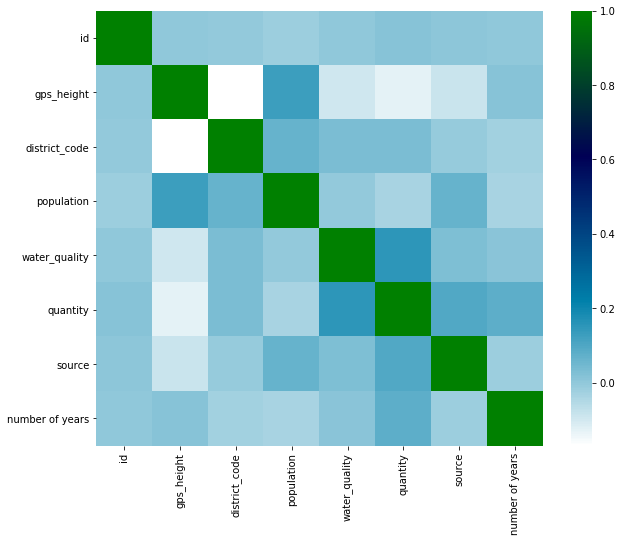

In [210]:
plt.figure(figsize = (10, 8))
sns.heatmap(eng_test_features.corr(), cmap = 'ocean_r')

In [73]:
# Using test data
eng_test_data = eng_test_features.drop(columns='id')
eng_test_data = scale(eng_test_data)
#Testing with Test data
eng_test_data

array([[ 1.9504066 , -0.2770127 ,  0.28136694, ...,  2.30668464,
         1.5863442 , -1.5088221 ],
       [ 1.32999082, -0.37911642,  0.23725387, ...,  0.28010498,
        -1.0264152 , -0.30005822],
       [ 1.32708489, -0.37911642,  0.65737833, ...,  0.28010498,
         1.5863442 , -1.30736145],
       ...,
       [ 1.19486514, -0.37911642,  0.02719163, ...,  0.28010498,
         3.54591375, -1.30736145],
       [ 0.50034818, -0.37911642, -0.07783948, ...,  0.28010498,
         0.93315435, -1.20663113],
       [-0.25083439, -0.2770127 , -0.30890794, ...,  1.29339481,
        -1.0264152 , -1.10590081]])

In [79]:
# Gridsearch results with test data
y_pred = gridsearch.predict(eng_test_data)
eng_prediction = pd.DataFrame(y_pred)
identities = pd.DataFrame(eng_test_features['id'])
print(identities.shape)
test_eng_first = identities.join(eng_prediction)
test_eng_first.rename(columns={0: 'status_group'}, inplace=True)

(14358, 1)


In [80]:
print(test_eng_first.shape)
test_eng_first.head()

(14358, 2)


,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [81]:
test_eng_first.to_csv(path_or_buf="/Users/danielleromanoff/Documents/Lambda/DS-Unit-2-Project-Week/Submission_3.csv", index=False)

In [101]:
# train_features.drop(train_features.loc[train_features['construction_year'] == 0].index, inplace=True)
# train_features.head()  

In [118]:
# train_features['construction_year'].mean()
train_features = pd.read_csv('train_features.csv')
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [168]:
train_features.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [120]:
train_features['funder'] = train_features['funder'].fillna(train_features['funder'].mode()[0])
train_features['installer'] = train_features['installer'].fillna(train_features['installer'].mode()[0])
train_features['subvillage'] = train_features['subvillage'].fillna(train_features['subvillage'].mode()[0])
train_features['public_meeting'] = train_features['public_meeting'].fillna(train_features['public_meeting'].mode()[0])
train_features['scheme_management'] = train_features['scheme_management'].fillna(train_features['scheme_management'].mode()[0])
train_features['permit'] = train_features['permit'].fillna(train_features['permit'].mode()[0])
train_features.shape

(59400, 40)

In [121]:
train_features.source = train_features.quantity.replace('unknown', 'nameless')
train_features.source = train_features.quantity.replace('other', 'unnamed')
train_features.quantity = train_features.quantity.replace('other', 'unexplained')
train_features.quantity = train_features.quantity.replace('unknown', 'misc')
train_features.water_quality = train_features.water_quality.replace('salty', 'alkaline')
train_features.water_quality = train_features.water_quality.replace('unknown', 'not_given')
train_features.extraction_type = train_features.extraction_type.replace('other', 'another')
train_features.shape

(59400, 40)

In [122]:
# train_features.source.value_counts()

In [123]:
train_features.construction_year = train_features.construction_year.replace(0, 1997)
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,enough,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,enough,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,dry,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,VWC,NaN,True,1997,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,seasonal,rainwater harvesting,surface,communal standpipe,communal standpipe


In [124]:
for col in train_features.columns:
    train_features['number of years'] = 2019 - train_features['construction_year']
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,number of years
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,enough,spring,groundwater,communal standpipe,communal standpipe,20
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,9
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,enough,dam,surface,communal standpipe multiple,communal standpipe,10
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,dry,borehole,groundwater,communal standpipe multiple,communal standpipe,33
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,VWC,NaN,True,1997,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,seasonal,rainwater harvesting,surface,communal standpipe,communal standpipe,22


In [125]:
train_features.shape

(59400, 41)

In [126]:
train_features = train_features.drop(columns='construction_year')
train_features = train_features.drop(columns='date_recorded')
train_features = train_features.drop(columns='scheme_name')
# train_features.shape
train_features.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,number of years
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,enough,spring,groundwater,communal standpipe,communal standpipe,20
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,9
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,enough,dam,surface,communal standpipe multiple,communal standpipe,10
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,dry,borehole,groundwater,communal standpipe multiple,communal standpipe,33
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,VWC,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,seasonal,rainwater harvesting,surface,communal standpipe,communal standpipe,22


In [111]:
# features_basin = pd.get_dummies(train_features['basin'])
features_source = pd.get_dummies(train_features['source'])
features_water_quality = pd.get_dummies(train_features['water_quality'])
features_extraction_type = pd.get_dummies(train_features['extraction_type'])
# features_region = pd.get_dummies(train_features['region'])

# new_features = train_features.drop(columns = 'basin')
# new_features = new_features.join(features_basin)
new_features = train_features.drop(columns ='source')
new_features = new_features.join(features_source)
new_features = new_features.drop(columns ='water_quality')
new_features = new_features.join(features_water_quality)
new_features = new_features.drop(columns ='extraction_type')
new_features = new_features.join(features_extraction_type)
# new_features = new_features.drop(columns ='region')
# new_features = new_features.join(features_region)
# new_features.head()
new_features.shape

(59400, 66)

In [112]:
new_features = new_features.drop(['other - mkulima/shinyanga'], axis=1)
new_features.shape

(59400, 65)

In [113]:
X = new_features.select_dtypes('number')
X = X.drop('id', axis=1)
# X.head()
X.shape

(59400, 39)

In [114]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [149]:
y = train_labels.drop(columns='id')

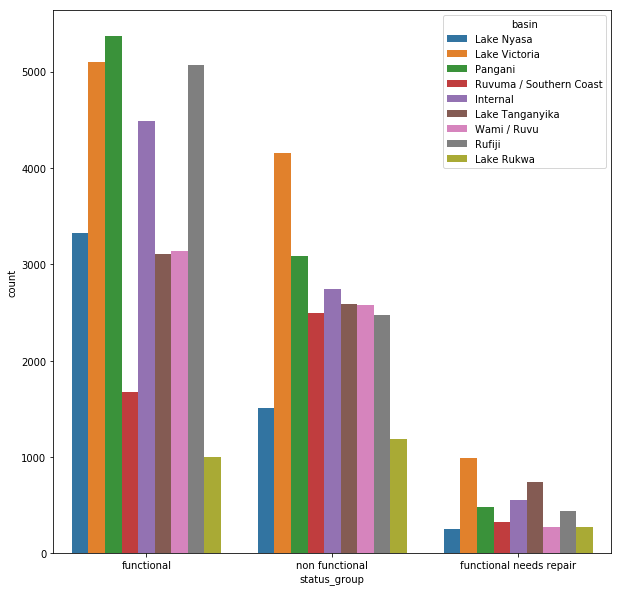

In [172]:
plt.figure(figsize = (10, 10))
ax = sns.countplot(x = train_labels.status_group, hue='basin', data=train_features)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44550, 39), (14850, 39), (44550, 1), (14850, 1))

In [216]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_train)
accuracy_score(y_train,y_pred)

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7067340067340068

In [244]:
test_features = pd.read_csv('test_features.csv')
test_features.shape

(14358, 40)

In [245]:
test_features['funder'] = test_features['funder'].fillna(test_features['funder'].mode()[0])
test_features['installer'] = test_features['installer'].fillna(test_features['installer'].mode()[0])
test_features['subvillage'] = test_features['subvillage'].fillna(test_features['subvillage'].mode()[0])
test_features['public_meeting'] = test_features['public_meeting'].fillna(test_features['public_meeting'].mode()[0])
test_features['scheme_management'] = test_features['scheme_management'].fillna(test_features['scheme_management'].mode()[0])
test_features['permit'] = test_features['permit'].fillna(test_features['permit'].mode()[0])
test_features.shape

(14358, 40)

In [246]:
test_features.source = test_features.quantity.replace('unknown', 'nameless')
test_features.source = test_features.quantity.replace('other', 'unnamed')
test_features.quantity = test_features.quantity.replace('other', 'unexplained')
test_features.quantity = test_features.quantity.replace('unknown', 'misc')
test_features.water_quality = test_features.water_quality.replace('salty', 'alkaline')
test_features.water_quality = test_features.water_quality.replace('unknown', 'not_given')
test_features.extraction_type = test_features.extraction_type.replace('other', 'another')

In [247]:
test_features.construction_year = test_features.construction_year.replace(0, 1997)
test_features.shape
# test_features.head()

(14358, 40)

In [248]:
for col in test_features.columns:
    test_features['number of years'] = 2019 - test_features['construction_year']
test_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,number of years
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,another,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,seasonal,rainwater harvesting,surface,other,other,7
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,insufficient,spring,groundwater,communal standpipe,communal standpipe,19
2,17168,0.0,2013-02-01,Government Of Tanzania,1567,DWE,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,True,2010,another,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,insufficient,rainwater harvesting,surface,other,other,9
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,True,GeoData Consultants Ltd,VWC,NaN,True,1987,another,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,dry,shallow well,groundwater,other,other,32
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,True,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,enough,spring,groundwater,communal standpipe,communal standpipe,19


In [249]:
test_features = test_features.drop(columns='construction_year')
test_features = test_features.drop(columns='date_recorded')
test_features = test_features.drop(columns='scheme_name')
test_features.shape

(14358, 38)

In [250]:
# test_basin = pd.get_dummies(test_features['basin'])
test_source = pd.get_dummies(test_features['source'])
test_water_quality = pd.get_dummies(test_features['water_quality'])
test_extraction_type = pd.get_dummies(test_features['extraction_type'])
# test_region = pd.get_dummies(test_features['region'])

# test_features = test_features.drop(columns = 'basin')
# test_features = test_features.join(test_basin)
test_features = test_features.drop(columns ='source')
test_features = test_features.join(test_source)
test_features = test_features.drop(columns ='water_quality')
test_features = test_features.join(test_water_quality)
test_features = test_features.drop(columns ='extraction_type')
test_features = test_features.join(test_extraction_type)
# new_test = new_test.drop(columns ='region')
# new_test = new_test.join(test_region)
# new_test.head()
test_features.shape

(14358, 65)

In [251]:
# train_features.region.value_counts()

In [252]:
# test_features.region.value_counts()

In [253]:
test_features = test_features.select_dtypes('number')
# test_features.head()
test_features.shape

(14358, 40)

In [254]:
# Using test data and scaling data with MinMaxScaler
X = test_features.drop(columns='id')
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
#Testing with Test data
X

array([[0.        , 0.72441778, 0.87515897, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.57374735, 0.90903149, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.57304164, 0.86219094, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.54093155, 0.86149513, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.37226535, 0.87867868, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.18983769, 0.86212129, ..., 0.        , 0.        ,
        0.        ]])

In [255]:
# Logistic Regression Model
y_pred = log_reg.predict(X)
test_prediction = pd.DataFrame(y_pred)
identities = pd.DataFrame(test_features['id'])
print(identities.shape)
testing = identities.join(test_prediction)
testing.rename(columns={0: 'status_group'}, inplace=True)

(14358, 1)


In [257]:
print(testing.shape)
testing.head()

(14358, 2)


,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional


In [258]:
testing.to_csv(path_or_buf="/Users/danielleromanoff/Documents/Lambda/DS-Unit-2-Project-Week/Submission_4.csv", index=False)